# Introduction to PaliGemma capabilities with KerasNLP


First, let's update our dependencies:

In [ ]:
!pip install -U -q keras keras-nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible

Let's make sure we're set up to download the model from Kaggle:

In [ ]:
import os
from google.colab import userdata

# Kaggle auth.
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

Now let's import Keras -- we'll use the JAX backend, but Keras & PaliGemma also work with PyTorch and TensorFlow

In [ ]:
# Set the backbend before importing Keras
os.environ["KERAS_BACKEND"] = "jax"

In [ ]:
# Import Keras & KerasNLP
import keras
import keras_nlp

# Import other useful tools
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Make sure we run in bfloat16, to save memory and compute
keras.config.set_floatx("bfloat16")

Next, let's grab the model from Kaggle. Multiple versions are available, in particular
different version targeting images in 224x224 resolution, 448x448, and 896x896. We'll use the larger one.

In [ ]:
# Load up the pretrained PaliGemma 3B model for 896x896 img inputs
pali_gemma_lm = keras_nlp.models.PaliGemmaCausalLM.from_preset(
    "pali_gemma_3b_896"
)
pali_gemma_lm.summary()

100%|██████████| 861/861 [00:00<00:00, 1.99MB/s]
100%|██████████| 5.45G/5.45G [01:04<00:00, 90.3MB/s]
100%|██████████| 410/410 [00:00<00:00, 279kB/s]
100%|██████████| 4.07M/4.07M [00:00<00:00, 16.7MB/s]


Preprocessor: "pali_gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ pali_gemma_tokenizer (PaliGemmaTokenizer)          │                                             257,152 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "pali_gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ images (InputLayer)           │ (None, 896, 896, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ response_mask (InputLayer)    │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pali_gemma_backbone           │ (None, None, 2048)        │   2,927,759,088 │ images[0][0],              │
│ (PaliGemmaBackbone)           │                           │                 │ padding_mask[0][0],        │
│                               │                           │                 │ response_mask[0][0],       │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 257152)      │     526,647,296 │ pali_gemma_backbone[0][0]  │
│ (ReversibleEmbedding)         │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, None, 257152)      │               0 │ token_embedding[1][0]      │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,927,759,088 (5.45 GB)

 Trainable params: 2,927,759,088 (5.45 GB)

 Non-trainable params: 0 (0.00 B)

Finally, let's define a couple of useful utilities. This version of PaliGemma takes images that are 896x896, so we'll need to resize our images to that format using `keras.ops.image.resize`. To avoid aspect ratio distortion, we'll pad non-square images using `pad_to_aspect_ratio=True`. You could also pass `crop_to_aspect_ratio=True` to crop instead of padding.

In [ ]:
image_size = (896, 896)

def resize_and_pad(x):
    return keras.ops.image.resize(x, image_size, pad_to_aspect_ratio=True)

def prepare_image(url):
    path = keras.utils.get_file(origin=url)
    image = keras.utils.load_img(path)
    return resize_and_pad(keras.utils.img_to_array(image))

Now we're ready to do some work.

## Image description & visual question answering



Let's start with a test image with some orange tulips. Can PaliGemma tell what's in the image?

525313/525313 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


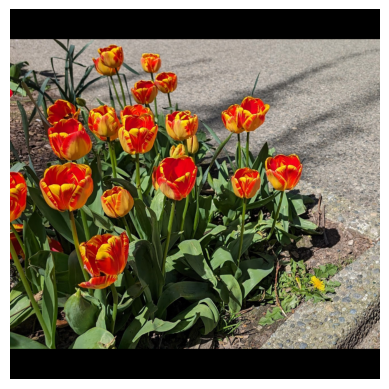

In [ ]:
image = prepare_image("https://s3.amazonaws.com/keras.io/img/book/flowers.jpg")
plt.imshow(keras.ops.convert_to_numpy(image).astype("uint8"))
plt.axis("off")
plt.show()

PaliGemma takes 2 inputs:

- `"images"`, a batch of 224x224x3 images.
- `"prompts"`, a list of string prompts -- one prompt per image.

To describe an image, prompt the model as with the command `"describe en\n"`, like this:

In [ ]:
outputs = pali_gemma_lm.generate(
    inputs={
        "images": keras.ops.expand_dims(image, axis=0),
        "prompts": ['describe en\n',],
    }
)
print(outputs[0])

describe en
Tulips in the park


You can also ask arbitrary questions about images:

In [ ]:
outputs = pali_gemma_lm.generate(
    inputs={
        "images": keras.ops.expand_dims(image, axis=0),
        "prompts": ['What color are the flowers?\n',],
    }
)
print(outputs[0])

What color are the flowers?
red and yellow


In [ ]:
outputs = pali_gemma_lm.generate(
    inputs={
        "images": keras.ops.expand_dims(image, axis=0),
        "prompts": ['What is the name of this flower?\n',],
    }
)
print(outputs[0])

What is the name of this flower?
tulips


## Object detection

You can also use PaliGemma to perform object detection and image segmentation. The commands to use are:

- `"detect {class}\n"`
- `"segment {class}\n"`

Let's try it on an image of a train:

950534/950534 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


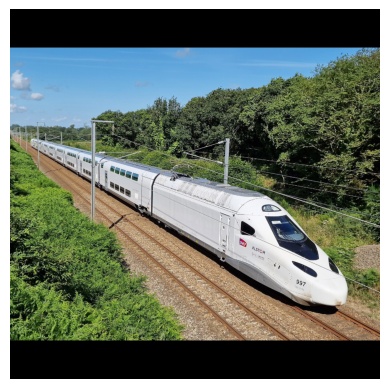

In [ ]:
image = prepare_image("https://s3.amazonaws.com/keras.io/img/book/tgv.jpg")
plt.imshow(keras.ops.convert_to_numpy(image).astype("uint8"))
plt.axis("off")
plt.show()

In [ ]:
outputs = pali_gemma_lm.generate(
    inputs={
        "images": keras.ops.expand_dims(image, axis=0),
        "prompts": ['detect train\n',],
    }
)
print(outputs[0])

detect train
<loc0355><loc0059><loc0824><loc0930> train


The first part of the output is the detection bounding box, and the second part is the class name -- "train". Let's plot the detection bounding over the image:

In [ ]:
import re
import matplotlib.patches as patches

def parse_bbox_and_labels(detokenized_output):
  matches = re.finditer(
      '<loc(?P<y0>\d\d\d\d)><loc(?P<x0>\d\d\d\d)><loc(?P<y1>\d\d\d\d)><loc(?P<x1>\d\d\d\d)>'
      ' (?P<label>.+?)( ;|$)',
      detokenized_output,
  )
  labels, boxes = [], []
  fmt = lambda x: float(x) / 1024.0
  for m in matches:
    d = m.groupdict()
    boxes.append([fmt(d['y0']), fmt(d['x0']), fmt(d['y1']), fmt(d['x1'])])
    labels.append(d['label'])
  return np.array(boxes), np.array(labels)

def display_boxes(image, boxes, labels):
  h, l = image.shape[0], image.shape[1]
  fig, ax = plt.subplots()
  ax.imshow(keras.ops.convert_to_numpy(image).astype("uint8"))
  ax.axis("off")
  for i in range(boxes.shape[0]):
      y, x, y2, x2 = (boxes[i]*h)
      width = x2 - x
      height = y2 - y
      # Create a Rectangle patch
      rect = patches.Rectangle((x, y),
                               width,
                               height,
                               linewidth=1,
                               edgecolor='r',
                               facecolor='none')
      # Add label
      plt.text(x, y, labels[i], color='red', fontsize=12)
      # Add the patch to the Axes
      ax.add_patch(rect)

  plt.show()

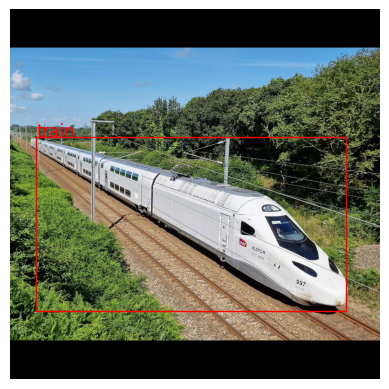

In [ ]:
display_boxes(image, *parse_bbox_and_labels("<loc0352><loc0072><loc0834><loc0929> train"))

## OCR

Finally, PaliGemma can also perform OCR.

463013/463013 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


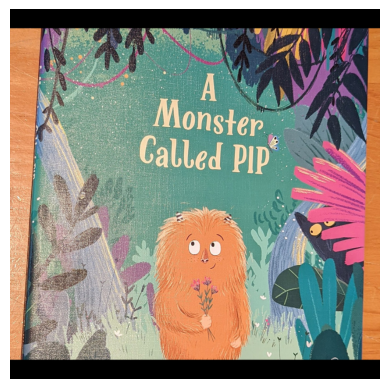

In [ ]:
image = prepare_image("https://s3.amazonaws.com/keras.io/img/book/pip.jpeg")
plt.imshow(keras.ops.convert_to_numpy(image).astype("uint8"))
plt.axis("off")
plt.show()

In [ ]:
outputs = pali_gemma_lm.generate(
    inputs={
        "images": keras.ops.expand_dims(image, axis=0),
        "prompts": ['ocr\n',],
    }
)
print(outputs[0])

ocr
a monster called pip


Here be monsters.

The model can even handle cases where multiple elements of text are present in the image:

289076/289076 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


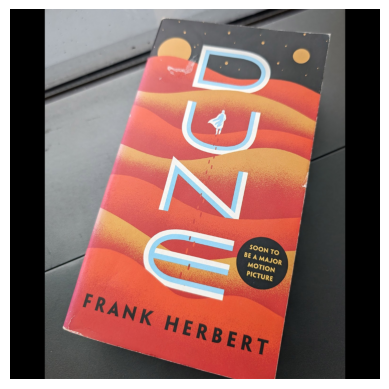

ocr
dune
soon to be a major motion picture
frank herbert


In [ ]:
image = prepare_image("https://s3.amazonaws.com/keras.io/img/book/dune.jpg")
plt.imshow(keras.ops.convert_to_numpy(image).astype("uint8"))
plt.axis("off")
plt.show()
outputs = pali_gemma_lm.generate(
    inputs={
        "images": keras.ops.expand_dims(image, axis=0),
        "prompts": ['ocr\n',],
    }
)
print(outputs[0])